# 1.7.Tabela de Distribuição de Frequência

Creation: July 2021.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

__O que é uma Tabela de Distribuição de Frequência?__

Uma tabela de distribuição de frequência tem por objetivo organizar o conjunto de dados sobre uma variável em grupos (que será chamado de classes), onde a partir de suas frquências pode-se de obter algumas informações, de outra forma, "[...] conhecer o _comportamento_ dessa variável, analisando a ocorrência de suas possíveis realizações."(BUSSAB e MORETTIN, 2004)

Importar as bibliotecas

In [5]:
import numpy as np
import pandas as pd
from math import sqrt,ceil
from statistics import mean, median, mode, pstdev
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('seaborn-v0_8')

## Variável quantitativa contínua

Obter o conjunto de dados.

Neste exemplo trata-se de um conjunto de dados fictício sobre as notas obtidas de uma turma de 41 estudantes da disciplina de matemática no ano de 2020.

In [12]:
values = pd.read_csv('datasets/notas_alunos.csv')
display(values)

,Estudante,Nota
0,Adam Smith,10.0
1,Alice Brown,8.0
2,Amanda Lee,8.5
3,Amanda Rodriguez,7.0
4,Amanda Stewart,5.5
5,Andrew Hall,5.2
6,Andrew Jackson,6.7
7,Andrew Kim,2.5
8,Ashley Hernandez,10.0
9,Ashley White,9.3


Antes da construção da tabela de distribuição de frequência, ainda com os dados brutos, podemos obter algumas informações sobre o conjunto de dados.

Tornar em ordem crescente o conjunto de dados brutos.

In [13]:
values.sort_values(by='Nota', inplace=True)
display(values)

,Estudante,Nota
16,Daniel Park,0.0
15,Cynthia Hernandez,0.0
21,Jack Park,1.0
14,Brian Lee,1.0
34,Michael Johnson,2.0
20,Grace Lee,2.0
7,Andrew Kim,2.5
13,Brian Jackson,2.5
35,Michael Lewis,2.5
33,Michael Brown,3.0


Obter a média, a mediana e a moda dos dados.

__Média:__ é uma medida que busca resumir, considerando todos os valores do conjunto de dados, em um valor central.

__Mediana:__ é a medida que divide o conjunto de dados __exatamente__ ao meio (em conjuntos de tamanho par é a média do dois valores centrais), por esse motivo que devemos tornar o conjunto de dados em ordem crescente.

__Moda:__ é o valor que mais se repete no conjunto de dados, pode não haver nenhum e poder haver multiplos valore modais.

O uso de uma (ou mais) medidas de tendência depende da _sensibilidade estatística_ do pesquisador, a partir do que cada uma representa e da necessidade.

In [14]:
# Mean
mean_value = np.around(mean(values['Nota']),2)
print('Média: {}'.format(mean_value))

# Median
median_value = np.around(median(values['Nota']),2)
print('Mediana: {}'.format(median_value))

# Mode
mode_value = np.around(mode(values['Nota']),2)
print('Moda: {}'.format(mode_value))

Média: 6.37
Mediana: 7.2
Moda: 10.0


Neste situação, vemos que média das notas obtidas pelos 41 estudantes é de 6.37, a nota que divide o conjunto de dados ao meio é 7.2 e a nota mais frequente no conjunto de dados é 10.

Com esses dados podemos criar um gráfico _Boxplot_

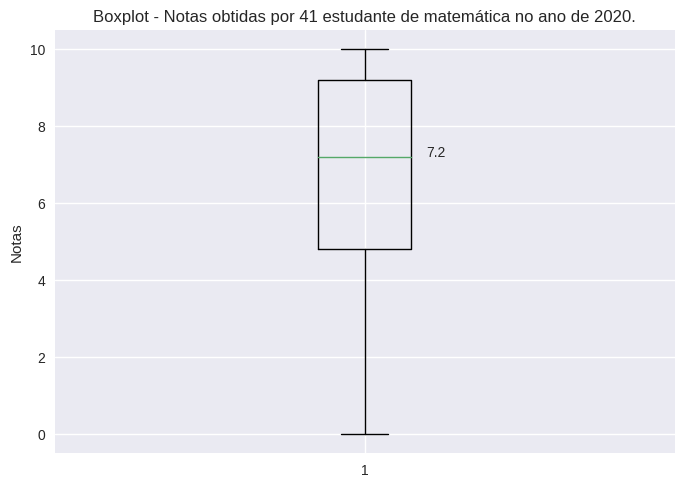

In [15]:
plt.boxplot(values['Nota'])
plt.title('Boxplot - Notas obtidas por 41 estudante de matemática no ano de 2020.')
plt.ylabel('Notas')
plt.text(1.1, median_value, str(median_value))
plt.show()

Podemos observar que não há _outliers_ no conjunto de dados. Além disso, vemos 3 quartis (ou 75%) dos dados estão acima da nota 5 (aproximadamente).

Para construção da tabela de distribuição de frequência precisamos compreender a nossa variável, recomenda-se a leitura do _notebook_ sobre classificação de variáveis. A variável do exemplo dado, sobre a notas de 41 estudantes da disciplina de matemática, é classificada como quantitativa contínua, onde o número real vária de 0 a 10, inclusive o 10.

Após a classificação do tipo da variável, podemos entender melhor como ocorrerá a construção da tabela de distribuição de frequência. Primeiramente, precisamos obter o número de classes e a amplitude de cada classe. Nesta tabela todas a classes terão amplitude iguais, porém a situações em que podem ser encontradas ou pode haver necessidade de ter em uma mesma tabela classes com amplitudes diferentes.

In [16]:
number_of_elements = np.size(values[['Nota']])
number_of_classes =  ceil(sqrt(number_of_elements))
total_amplitude = max(values['Nota']) - min(values['Nota'])
class_breadth = np.around(((max(values['Nota']) - min(values['Nota'])) / number_of_classes),2)

Criar uma lista com o limite inferior de cada classe.

In [18]:
inferior_limits = []
for value in range(0,number_of_classes):
    element = min(values['Nota']) + (class_breadth * value)
    inferior_limits.insert(value, np.around(element,2))

Criar uma lista com o limite superior de cada classe.

In [19]:
upper_limits = []
for value in inferior_limits:
    upper_limit = np.around(value + class_breadth, 2)
    upper_limits.append(upper_limit)

Criar um multi index com os limites inferiores e os limites superiores.

In [20]:
classes = [inferior_limits, upper_limits]
classes = pd.MultiIndex.from_arrays(classes, names=['Limite inferior', 'Limite superior'])

Criar uma lista com a frequência absoluta de cada classe.

In [21]:
#fi: absolute frequency
fi = []
fi_counter = 0
for value in range(0,number_of_classes):
    frequency = 0
    for value_02 in values['Nota']:
        if fi_counter < number_of_classes - 1:    
            if value_02 >= inferior_limits[fi_counter] and value_02 < inferior_limits[fi_counter + 1]:
                frequency +=1
        if fi_counter == number_of_classes - 1:
            if value_02 >= inferior_limits[fi_counter]:
                frequency += 1
    fi.insert(fi_counter,frequency)
    fi_counter +=1

Criar uma lista com a frequência relativa de cada classe. Essa lista é criada a partir da lista de frequência absoluta.

In [22]:
#fi_relative: relative frequency
fi_relative = []
for value in range(0, number_of_classes):
    element = fi[value] / number_of_elements
    fi_relative.append(np.around(element, 5))

Converter o valor de cada valor da lista de frequência relativa para a forma por cento (%).

In [23]:
#_100fi_relative: relative (in %) frequency
_100fi_relative = list(map(lambda value: np.around(value * 100, 2), fi_relative))

Função _cumulate_: dado uma lista de valores, retorna uma lista com os seus valores acumulados, por exemplo, list_accumulated[0] = values[0]; list_accumulated[1] = values[0] + values[1]; e assim sucessivamente.

In [24]:
def cumulate(values):
    list_accumulated = [values[0]]
    for counter in range(1, len(values)):
        element = list_accumulated[counter - 1] + values[counter]
        element = np.around(element, 2)
        list_accumulated.append(element)
    
    return list_accumulated 

Utilização da função _cumulate_ para obter uma lista com a frequencia absoluta acumulada.

In [25]:
#fi: cumulative absolute frequency
fi_accumulated = cumulate(fi)

Utilização da função _cumulate_ para obter uma lista com a frequencia absoluta acumulada.

In [26]:
#_100fi_relative: cumulative relative (in %) frequency
_100fi_relative_accumulated = cumulate(_100fi_relative)

Criar uma lista com o ponto médio de cada classe.

O ponto médio é utilizado somente quando a variável é quantitativa e a sua finalidade é representar a classe na qual está associada.

In [27]:
midpoint_lambda = lambda value: np.around((inferior_limits[value] + upper_limits[value]) / 2, 2)
midpoint = list(map(midpoint_lambda, range(0,7)))

Contruir o DataFrame.

In [29]:
data_names = ['Fi', 'Fi (%)', 'Fi Acumulado', 'Fi (%) Acumulado', 'Ponto médio']
data_values = [fi, _100fi_relative, fi_accumulated, _100fi_relative_accumulated, midpoint]
data = {}
for value in range(0, len(data_names)):
    data[data_names[value]] = data_values[value]


In [30]:
frequency_distribution = pd.DataFrame(index=classes, data=data)

In [31]:
frequency_distribution

,,Fi,Fi (%),Fi Acumulado,Fi (%) Acumulado,Ponto médio
Limite inferior,Limite superior,,,,,
0.00,1.43,4,9.76,4,9.76,0.72
1.43,2.86,5,12.20,9,21.96,2.14
2.86,4.29,1,2.44,10,24.40,3.58
4.29,5.72,7,17.07,17,41.47,5.00
5.72,7.15,3,7.32,20,48.79,6.44
7.15,8.58,7,17.07,27,65.86,7.86
8.58,10.01,14,34.15,41,100.01,9.30


_Plots_ com algumas informações da tabela.

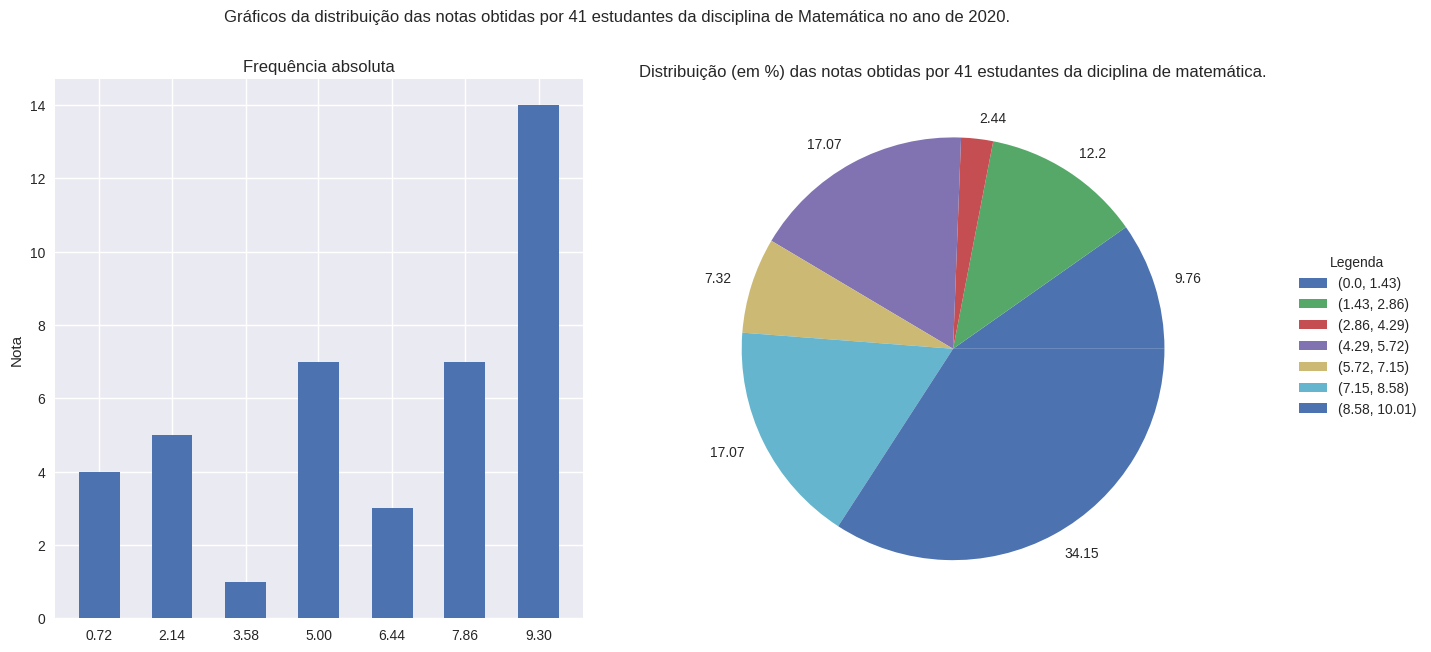

In [33]:
figure = plt.figure(figsize=(15,7))
figure.suptitle('Gráficos da distribuição das notas obtidas por 41 estudantes da disciplina de Matemática no ano de 2020.')
plots = figure.subplots(nrows=1, ncols=2)

plots[0].bar(frequency_distribution['Ponto médio'], frequency_distribution['Fi'])
plots[0].set_title('Frequência absoluta')
plots[0].set_ylabel('Nota')
plots[0].set_xticks(midpoint)

plots[1].pie(x=frequency_distribution['Fi (%)'], labels=_100fi_relative)
plots[1].set_title('Distribuição (em %) das notas obtidas por 41 estudantes da diciplina de matemática.')
plots[1].legend(bbox_to_anchor=(0.9,0.2,0.5,0.5), title='Legenda', labels=classes)

plt.show()

## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.